# Classification of 100 Bird Species Using the BIRDS 525 Species Image Dataset"

Data set of 525 bird species. 84635 training images, 2625 test images(5 images per species) and 2625 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. Note: all images are original and not created by augmentation

100 species will be chosen randomly, a model will be trained and evaluated using the test images

By: Daniel Navarro Quiros

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
import os
import random
import tensorflow as tf
import time

In [33]:
print("TF is using GPU:")
print(tf.config.list_physical_devices('GPU'))

TF is using GPU:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Viewing some images

Let's randomly view some images to see what we are dealing with.

In [3]:
def random_image():
    random_species=np.random.choice(os.listdir('train'))
    random_bird=np.random.choice(os.listdir(f'train/{random_species}'))
    random_bird_dir='train/'+random_species+'/'+random_bird
    image = imread(random_bird_dir)

    return image, random_species

In [4]:
def plot_image_grid(num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 30))
    for i in range(num_rows):
        for j in range(num_cols):
            image, species = random_image()
            axes[i, j].imshow(image)
            axes[i, j].set_title(species)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

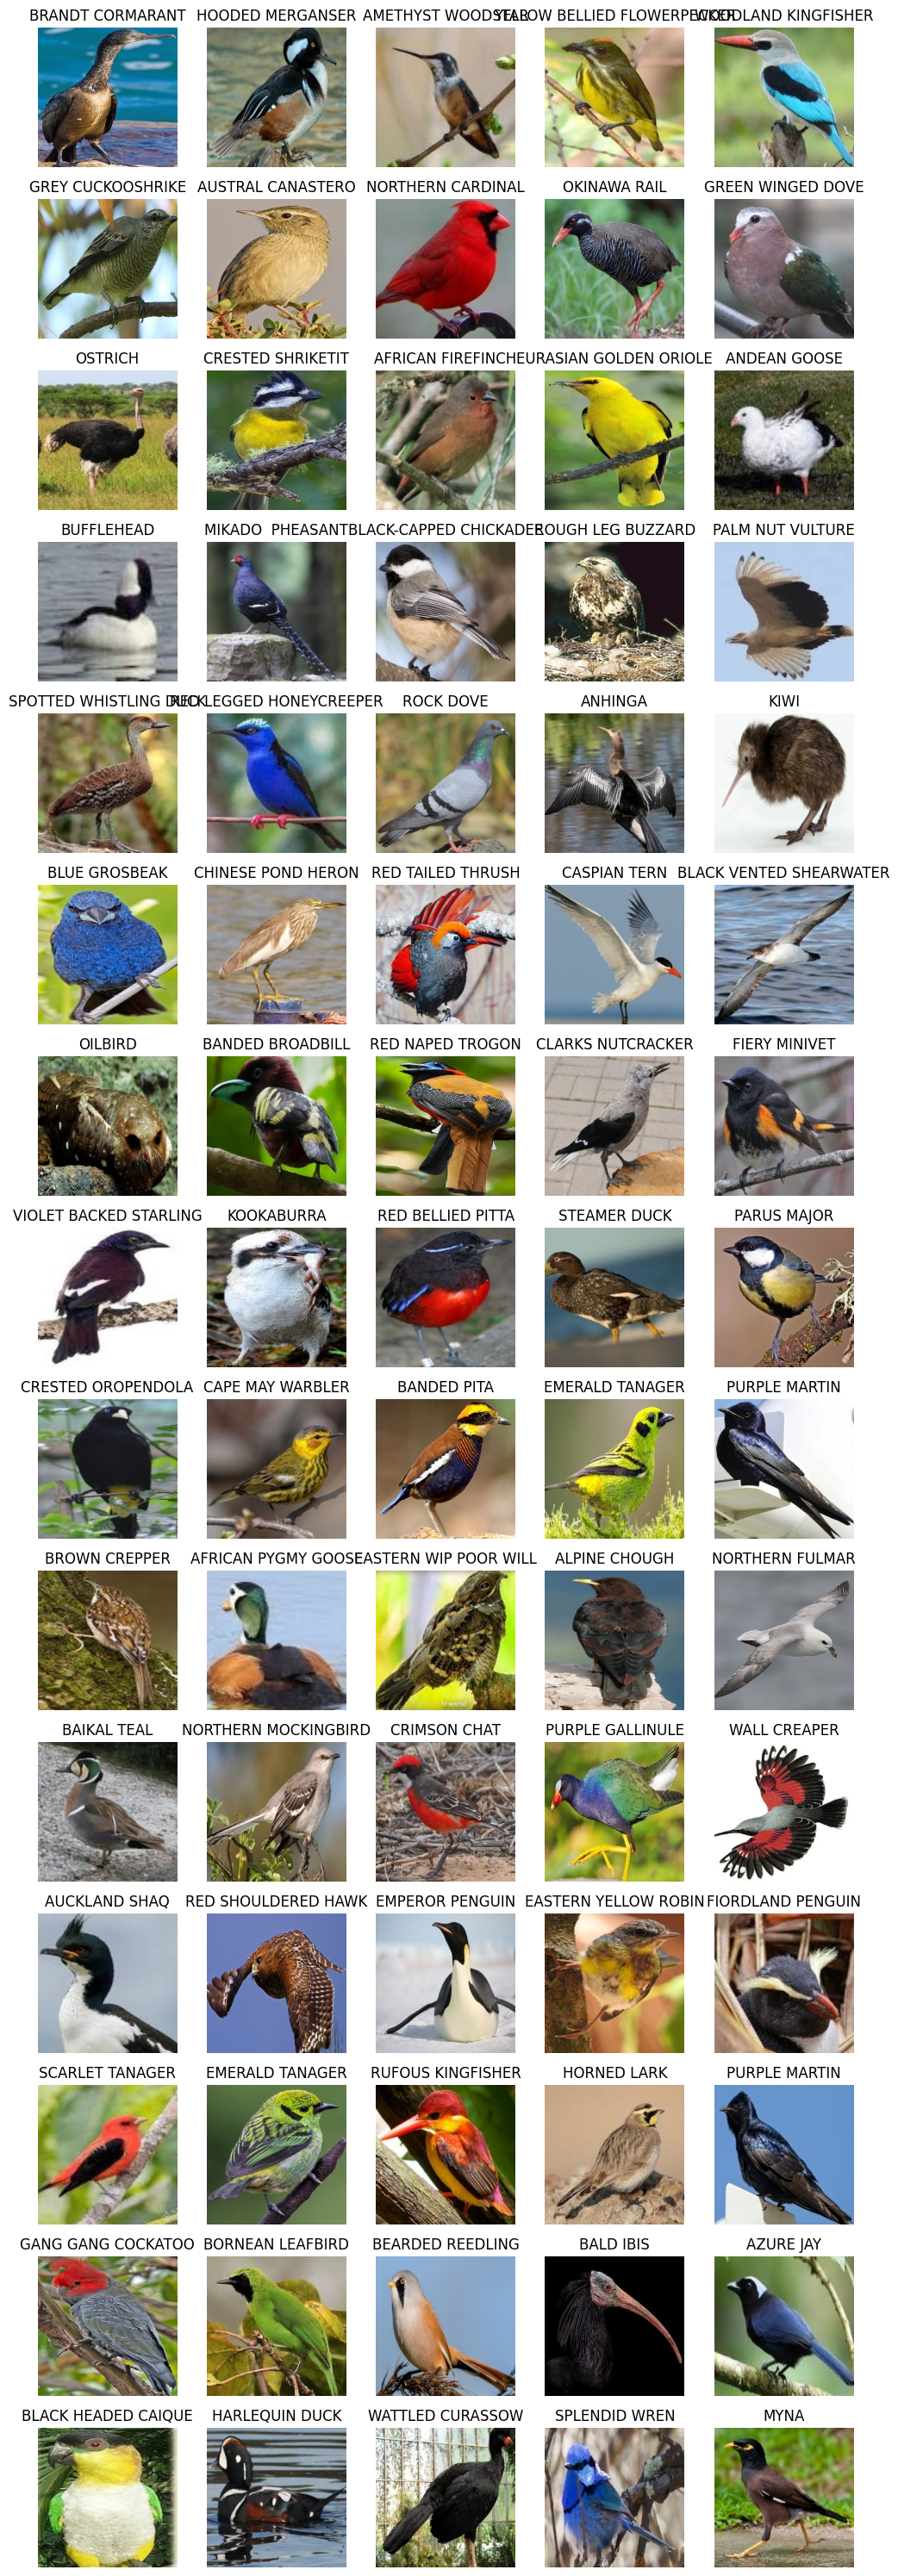

In [5]:
plot_image_grid(15,5)

## Selecting 100 random species 

In [6]:
random_species= random.sample(os.listdir('train'), 100)

In [34]:
print(random_species)

['DUSKY ROBIN', 'VIOLET CUCKOO', 'LILAC ROLLER', 'VIOLET BACKED STARLING', 'GREAT XENOPS', 'COLLARED CRESCENTCHEST', 'GLOSSY IBIS', 'BREWERS BLACKBIRD', 'LESSER ADJUTANT', 'JANDAYA PARAKEET', 'AFRICAN PYGMY GOOSE', 'BROWN THRASHER', 'HYACINTH MACAW', 'BLACK FRANCOLIN', 'WHITE BREASTED WATERHEN', 'WHITE TAILED TROPIC', 'NORTHERN PARULA', 'BLUE COAU', 'IBERIAN MAGPIE', 'CRIMSON SUNBIRD', 'MAGPIE GOOSE', 'FRIGATE', 'CINNAMON TEAL', 'WATTLED CURASSOW', 'BARN SWALLOW', 'CANVASBACK', 'CABOTS TRAGOPAN', 'INDIAN BUSTARD', 'HORNED GUAN', 'BLACK-CAPPED CHICKADEE', 'CANARY', 'OILBIRD', 'GRAY CATBIRD', 'GURNEYS PITTA', 'CHUCAO TAPACULO', 'STRIPPED SWALLOW', 'ELEGANT TROGON', 'AMERICAN COOT', 'AMERICAN REDSTART', 'BLUE THROATED TOUCANET', 'NORTHERN CARDINAL', 'ALBATROSS', 'RED KNOT', 'LUCIFER HUMMINGBIRD', 'COCKATOO', 'RED FACED WARBLER', 'CINNAMON FLYCATCHER', 'PYRRHULOXIA', 'WHIMBREL', 'RED LEGGED HONEYCREEPER', 'GAMBELS QUAIL', 'SRI LANKA BLUE MAGPIE', 'MARABOU STORK', 'INDIAN PITTA', 'HOUSE FIN

In [8]:
#moving 100 species to temporary folder files
def moving_images(data_set,random_species,first=True):
    temp_data_set=data_set+'_temp'
    if first:
        
        for species in random_species:
            shutil.move(f'{data_set}/{species}', f'{temp_data_set}/{species}')
    else:
        for species in random_species:
            shutil.move( f'{temp_data_set}/{species}',f'{data_set}/{species}')
    return temp_data_set

        
    

In [9]:
train_dir=moving_images('train',random_species)
test_dir=moving_images('test',random_species)
valid_dir=moving_images('valid',random_species)

## Preprocessing and charging the images

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
shape=random_image()[0].shape

In [12]:
max_value=random_image()[0].max()

In [13]:
image_gen = ImageDataGenerator(rescale=1/max_value,
                               rotation_range=40,  # Random rotation within a range of ±40 degrees
                               width_shift_range=0.2,  # Random horizontal shift
                               height_shift_range=0.2,  # Random vertical shift
                               shear_range=0.2,  # Random shear deformation
                               zoom_range=0.2,  # Random zoom
                               horizontal_flip=True,  # Random horizontal flip
                                fill_mode='nearest')

In [14]:
#Let's choose a batch size of 32 and target image size will be (224,224)
batch_size = 32
target_size=shape[0:2]

In [17]:
shape

(224, 224, 3)

In [15]:
train = image_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,  
    class_mode='categorical',
    target_size=target_size,)

validation = image_gen.flow_from_directory(
    valid_dir,
    batch_size=batch_size,  
    class_mode='categorical',
    target_size=target_size)

test= image_gen.flow_from_directory(
    test_dir,
    batch_size=batch_size,  
    class_mode='categorical',
    target_size=target_size,shuffle=False)

Found 16316 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


## Creating the model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import regularizers

In [18]:
tf.keras.backend.clear_session()

After conducting numerous experiments with different architectures, layers, and filter numbers, the following model exhibited the best performance:

* 6 convolutional layers
* 1 flatten layer
* 1 output layer with 100 neurons (one per class)

In [19]:
start_time = time.time()
model = Sequential()



# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=64*2, kernel_size=(3, 3), input_shape=shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=64*3, kernel_size=(3, 3), input_shape=shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=64*4, kernel_size=(3, 3), input_shape=shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=64*5, kernel_size=(3, 3), input_shape=shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=64*6, kernel_size=(3, 3), input_shape=shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# FLATTEN
model.add(Flatten())


#Output layer
model.add(Dense(len(test.class_indices), activation='softmax'))

# COMPILATION
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),#0.001
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=3)

#Fit the data
model.fit(train,epochs=50,validation_data=validation,callbacks=[early_stop],batch_size=batch_size)
end_time = time.time()

elapsed_time = (end_time - start_time)/60

print(f"Processing Time: {elapsed_time} minutes")

Epoch 1/50
510/510 [==============================] - 191s 360ms/step - loss: 4.3582 - accuracy: 0.0330 - val_loss: 3.9166 - val_accuracy: 0.0800
Epoch 2/50
510/510 [==============================] - 118s 232ms/step - loss: 3.7311 - accuracy: 0.1110 - val_loss: 3.5235 - val_accuracy: 0.1340
Epoch 3/50
510/510 [==============================] - 108s 211ms/step - loss: 3.2803 - accuracy: 0.1989 - val_loss: 2.9022 - val_accuracy: 0.2500
Epoch 4/50
510/510 [==============================] - 103s 202ms/step - loss: 2.8697 - accuracy: 0.2893 - val_loss: 2.5721 - val_accuracy: 0.3500
Epoch 5/50
510/510 [==============================] - 101s 199ms/step - loss: 2.5604 - accuracy: 0.3484 - val_loss: 2.3696 - val_accuracy: 0.4280
Epoch 6/50
510/510 [==============================] - 102s 200ms/step - loss: 2.3300 - accuracy: 0.4054 - val_loss: 2.2331 - val_accuracy: 0.4120
Epoch 7/50
510/510 [==============================] - 100s 195ms/step - loss: 2.1556 - accuracy: 0.4455 - val_loss: 1.8851 -

# Evaluating the model

<Axes: >

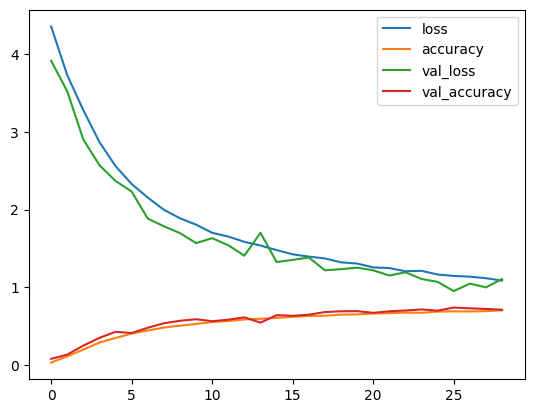

In [20]:
pd.DataFrame(model.history.history).plot()

Both the training set loss (loss) and the validation set loss (val_loss) steadily decrease together during model training, indicating effective learning without overfitting. This suggests that the model is generalizing well to new data, which is a positive sign for its performance.

In [21]:
metrics = model.evaluate(test)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

16/16 [==============================] - 5s 296ms/step - loss: 0.9137 - accuracy: 0.7700
Accuracy: 0.7699999809265137


77% of accuracy!

# Predicting using test data

In [22]:
pred=model.predict(test)

16/16 [==============================] - 3s 184ms/step


In [23]:
predicted_labels = np.argmax(pred, axis=1)

In [36]:
from sklearn.metrics import classification_report
performance=classification_report(test.labels,predicted_labels,output_dict=True)
print(classification_report(test.labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5
           2       0.75      0.60      0.67         5
           3       0.33      0.60      0.43         5
           4       0.80      0.80      0.80         5
           5       1.00      1.00      1.00         5
           6       0.67      0.80      0.73         5
           7       0.67      0.40      0.50         5
           8       1.00      0.80      0.89         5
           9       0.50      0.40      0.44         5
          10       0.50      0.40      0.44         5
          11       0.71      1.00      0.83         5
          12       0.75      0.60      0.67         5
          13       0.56      1.00      0.71         5
          14       0.83      1.00      0.91         5
          15       1.00      0.80      0.89         5
          16       0.71      1.00      0.83         5
          17       0.50    

Here we can see the performance of the model across each class, where there are many with 100% accuracy and bad results for some classes

# Checking some predictions

Let's check some predictions and the probability that that result is correct

In [25]:
test_images, test_labels = [], []
for i in range(len(test)):
    batch_images, batch_labels = test[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [56]:
def show_predicted_image(index,class_indices=test.class_indices):
    prob=np.round(performance[str(predicted_labels[index])]['precision']*100)
    class_indices = {value: key for key, value in class_indices.items()}
    plt.title(f'Predicted species: {class_indices[predicted_labels[index]]}. Probability: {prob}% \n Correct species: {class_indices[np.where(test_labels[index]==1)[0][0]]}')
    plt.imshow(test_images[index])
    plt.show()

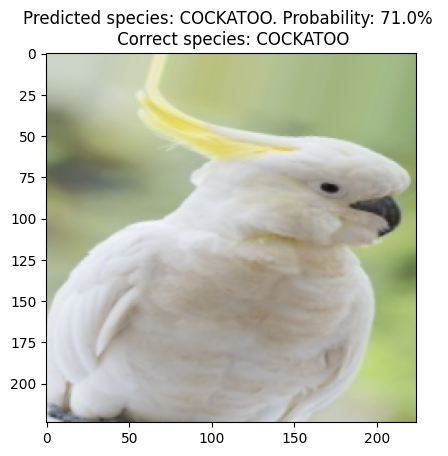

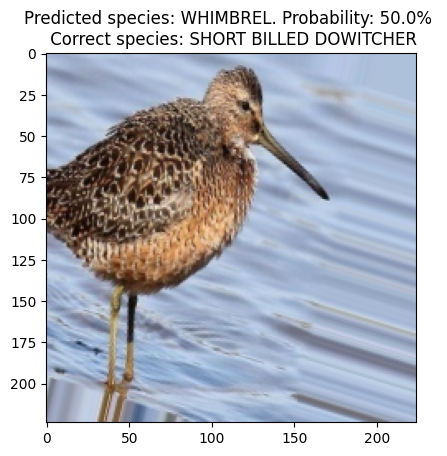

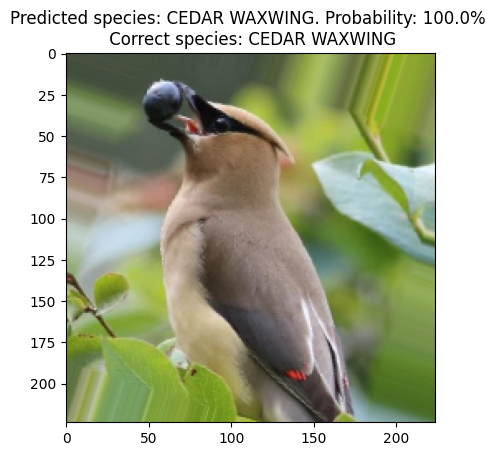

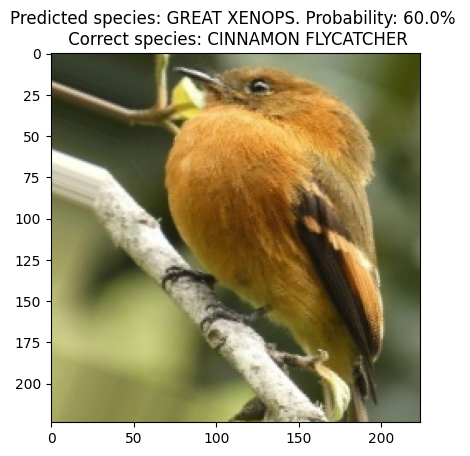

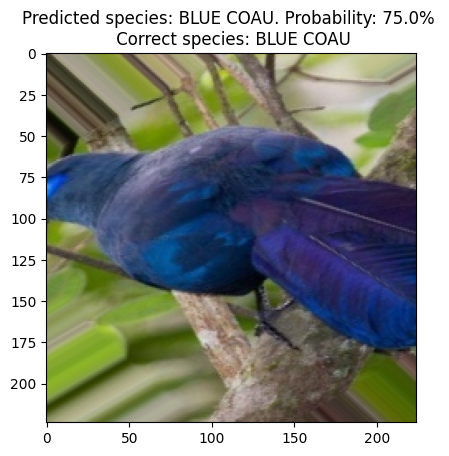

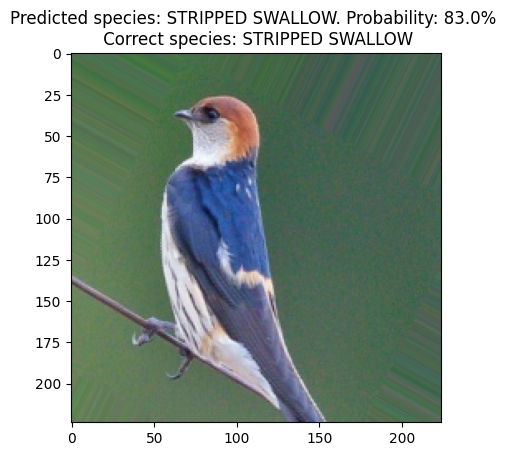

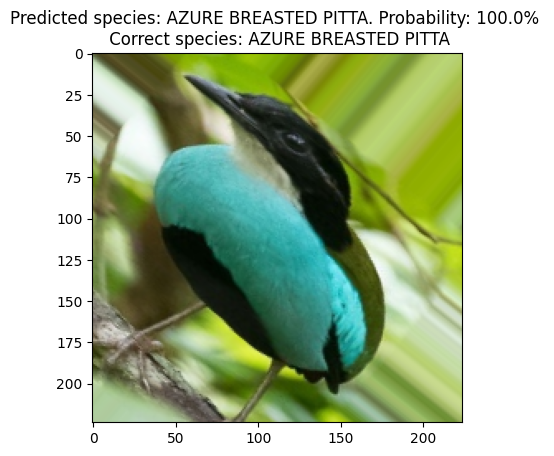

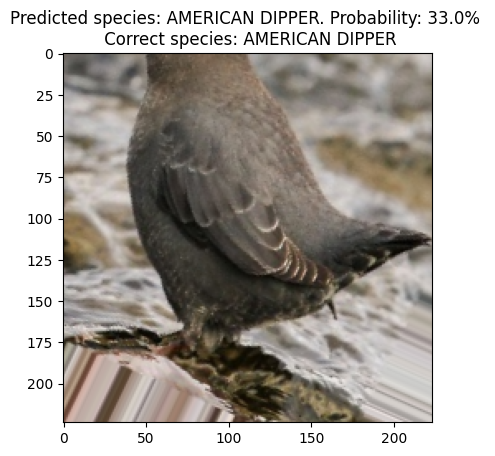

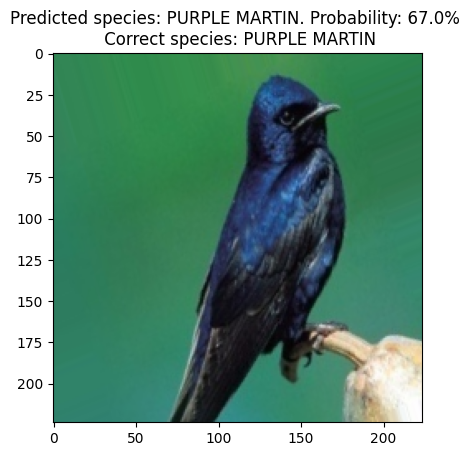

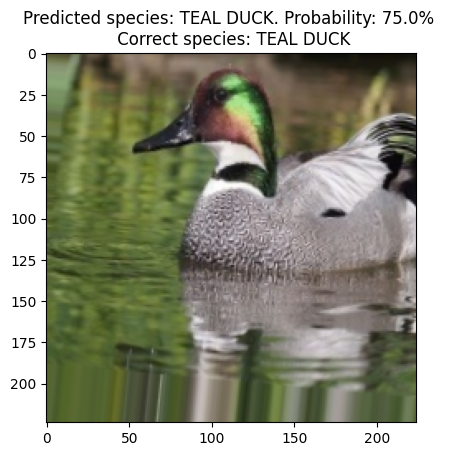

In [57]:
for i in np.random.randint(0, len(test_labels), size=10):
    show_predicted_image(i)
    

# Returning the images to original folder file

In [ ]:
train_dir=copy_images('train',random_species,first=False)
test_dir=copy_images('test',random_species,first=False)
valid_dir=copy_images('valid',random_species,first=False)